<a href="https://colab.research.google.com/github/alicerueda/TFSqueezed-CRNN/blob/master/MainPSDTFSqueeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install soundfile

In [0]:
import os
import glob
import numpy as np
import pandas as pd
import random
import soundfile as sf
import matplotlib.pyplot as plt

import sys
sys.path.append('/content/drive/My Drive/DCASE19 ASC/')
import tfutil

In [0]:
# Reading all the available filename for each recording type and display the number of recordings
# IMPORTANT: You might need to execute this section again, if the next part does not work correctly.
os.chdir('/content/drive/My Drive/DCASE19 ASC/')
os.listdir()
audiopath = './TAU-urban-acoustic-scenes-2019-development/audio/'

txt = audiopath + 'airport*.wav'
airportaddrs = glob.glob(txt)
txt = audiopath + 'shopping_mall*.wav'
shopping_malladdrs = glob.glob(txt)
txt = audiopath + 'metro_station*.wav'
metro_stationaddrs = glob.glob(txt)
txt = audiopath + 'street_pedestrian*.wav'
street_pedestrianaddrs = glob.glob(txt)
txt = audiopath + 'public_square*.wav'
public_squareaddrs = glob.glob(txt)
txt = audiopath + 'street_traffic*.wav'
street_trafficaddrs = glob.glob(txt)
txt = audiopath + 'tram*.wav'
tramaddrs = glob.glob(txt)
txt = audiopath + 'bus*.wav'
busaddrs = glob.glob(txt)
txt = audiopath + 'metro-*.wav'
metroaddrs = glob.glob(txt)
txt = audiopath + 'park*.wav'
parkaddrs = glob.glob(txt)


addrs = [airportaddrs, shopping_malladdrs, metro_stationaddrs,
         street_pedestrianaddrs, public_squareaddrs, street_trafficaddrs,
         tramaddrs, busaddrs, metroaddrs, parkaddrs]

addrs = np.asarray(addrs)

In [0]:
print(addrs.shape)
print(addrs[0][100])
print(np.size(addrs[0]))

(10, 1440)
./TAU-urban-acoustic-scenes-2019-development/audio/airport-london-205-6232-a.wav
1440


In [0]:
# Helper function to plot the Power Spectral Density
def plot_images(psd, addr, plotrows, figSizeHeight=10):
  
  #nrow, ncol = psd[0].shape
  #plotrows = int(np.floor(nrow/2))

  figSizeWidth = 20
  #figSizeHeight = 20

  # Create figure with sub-plots.
  fig, axes = plt.subplots(5, 4)
  fig.set_size_inches(figSizeWidth, figSizeHeight)

  # Adjust spacing between subplots.
  hspace = 1
  fig.subplots_adjust(hspace=hspace, wspace=0.3)


  for i, ax in enumerate(axes.flat):
      # There may be less than 10 images, ensure it doesn't crash.
      if i < len(addr):
          # Plot image.
          image = psd[i]
          #maxpsd = np.max(image[0][0:nrow])   # The display is set to range [0:maxpsd], where maxpsd=3.1813424. Anything larger than that will have full pixel value of 255
          ax.imshow(image[0:plotrows],
                    cmap='gray_r', 
                    vmin=0, 
                    vmax=255, 
                    origin='lower')

          # Show true and predicted classes.
          xlabel = os.path.basename(addr[i])

          # Show the classes as the label on the x-axis.
          ax.set_xlabel(xlabel)

      # Remove ticks from the plot.
      ax.set_xticks([])
      ax.set_yticks([])

  # Ensure the plot is shown correctly with multiple plots
  # in a single Notebook cell.
  plt.show()

  np.size(image)

117 234


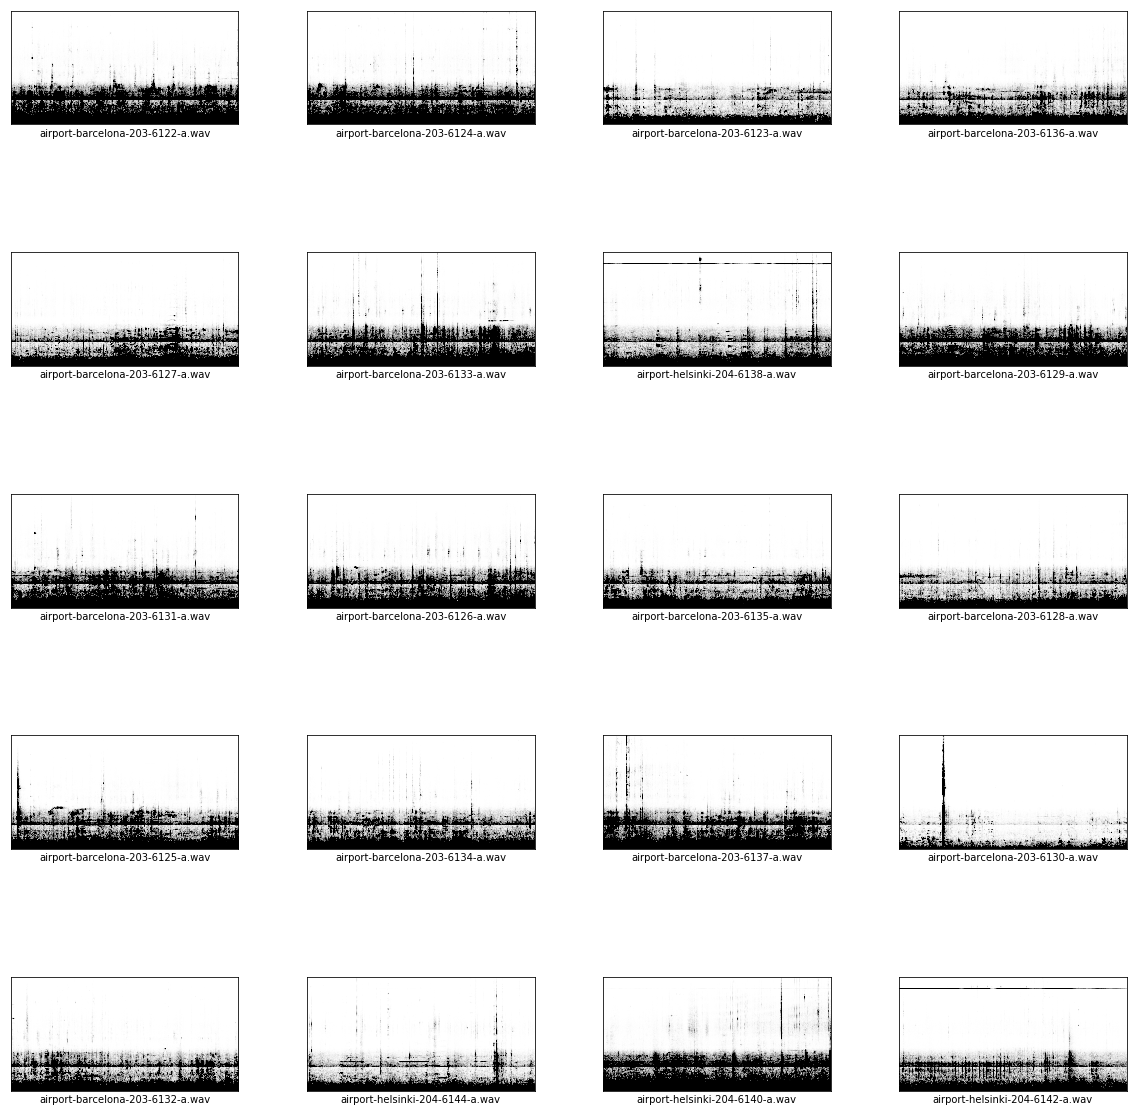

In [0]:
tfSqueezedPSD = [[] for x in range(30)]
recordtype = 0

for i in range(1):
  for j in range(30):
    addr = addrs[recordtype][j]
    audio, fs = sf.read(addr)
    sound1 = audio[:,0]
    _, _, psd, _ = tfutil.createPSD(sound1,fs)
    truncNormPSD = tfutil.truncatePSD(psd)
    timeSqueezedPSD = tfutil.groupTimePSD(truncNormPSD, N=4)
    tfSqueezedPSD[j]= tfutil.groupFreqPSD(timeSqueezedPSD, Nupper=5)
    #freqSqueezedPSD = tfutil.groupFreqPSD(timeSqueezedPSD, Nupper=5)
    #tfSqueezedPSD[j] = tfutil.truncatePSD(freqSqueezedPSD, threshold2=20)

nrow,ncol = tfSqueezedPSD[0].shape
print(nrow,ncol)
plot_images(tfSqueezedPSD[0:20],addrs[recordtype][0:20], nrow, 20)




In [0]:
# create and save the squeezed PSD with double emphasis into binary file
OutPath = '/content/drive/My Drive/DCASE19 ASC/TFSqueezedDoubleEmp/'

recordtype = ['airport','shopping_mall','metro_station','street_pedestrian',
             'public_square', 'street_traffic', 'tram', 'bus', 'metro', 'park']

for i in range(3):
  numfiles = np.size(addrs[i])
  print('\n \n')
  print('processing ', recordtype[i])
  for j in range(numfiles):
    addr = addrs[i][j]
    
    # Processing signal
    audio, fs = sf.read(addr)
    sound1 = audio[:,0]
    _, _, psd, _ = tfutil.createPSD(sound1,fs)
    truncNormPSD = tfutil.truncatePSD(psd)
    timeSqueezedPSD = tfutil.groupTimePSD(truncNormPSD, N=4)
    #tfSqueezedPSD= tfutil.groupFreqPSD(timeSqueezedPSD, Nupper=5)
    freqSqueezedPSD = tfutil.groupFreqPSD(timeSqueezedPSD, Nupper=5)
    tfSqueezedPSD = tfutil.truncatePSD(freqSqueezedPSD, threshold2=20)

    # Saving data to file
    filename, _ = os.path.splitext(os.path.basename(addr))
    filename = OutPath+filename+'.npy'
    print('Filename: ',i, ',  ',j, ' ',  filename)
    #freqSqueezedPSD.to_csv(filename, sep=',', header=False, index=False) # Not using pd.DataFrame
    np.save(filename, tfSqueezedPSD)
    



In [0]:
# create and save the squeezed PSD with single emphasis into binary file
OutPath = '/content/drive/My Drive/DCASE19 ASC/TFSqueezedSingleEmp/'

# Saving data to file
for i in range(6):
  numfiles = np.size(addrs[i])
  print('\n \n')
  print('processing ', recordtype[i])
  for j in range(numfiles):
    addr = addrs[i+4][j]
    
    # Processing signal
    audio, fs = sf.read(addr)
    sound1 = audio[:,0]
    _, _, psd, _ = tfutil.createPSD(sound1,fs)
    truncNormPSD = tfutil.truncatePSD(psd)
    timeSqueezedPSD = tfutil.groupTimePSD(truncNormPSD, N=4)
    freqSqueezedPSD = tfutil.groupFreqPSD(timeSqueezedPSD, Nupper=5)

    filename, _ = os.path.splitext(os.path.basename(addr))
    filename = OutPath+filename+'.npy'
    print('Filename: ',i+4, ',  ',j, ' ',  filename)
    np.save(filename, freqSqueezedPSD)

